# Comparison toy MC wt sim data
Check if M.Schwarz included the quantum efficiency

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

In [3]:
dirin = os.path.join("..", "..", "Data", "ar39", "06-14-2020-10M")
fileprefix = "roi_RndSeed123456789_part1_part*.csv"

df = load_dataframe_from_files(dirin, fileprefix)

[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part1.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part2.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part3.csv


/home/luigi/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part4.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part5.csv


In [5]:
df = df[df.columns[:-1]]

In [6]:
df.eventnumber.nunique()

9832142

In [7]:
df.head()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID,detectionefficiency
0,11,1,328.529918,0.000000,11464308371431671808,-344.445324,-119.348029,511.779003,0.113927,-0.412221,0.903933,0,4,eIoni,0,0.000656
1,11,1,139.349628,0.000000,27891997106451349504,-329.611182,181.991834,711.103243,0.541476,0.715440,0.441531,1,4,eIoni,0,0.000984
2,11,1,353.693250,34.262027,9313250882323568640,-135.129531,-254.823677,-301.085876,-0.548984,0.723592,0.418368,2,4,eIoni,0,0.002952
3,11,1,34.262027,0.000000,9313250882323568640,-135.457606,-254.758617,-300.944470,-0.548984,0.723592,0.418368,2,4,eIoni,0,0.002952
4,11,1,91.591954,0.000000,17256965188529301504,193.351075,-427.208468,55.204848,-0.742827,-0.660542,-0.109055,3,4,eIoni,0,0.000328


In [29]:
op_yield = 40
quantum_eff = .40
df["pedetected_noquantum"] = round(df["energydeposition"] * op_yield * df["detectionefficiency"])
df["pedetected_wtquantum"] = round(df["energydeposition"] * op_yield * df["detectionefficiency"] * quantum_eff)

In [30]:
pe_gby = df.groupby("eventnumber")[["pedetected_noquantum", "pedetected_wtquantum"]].sum()

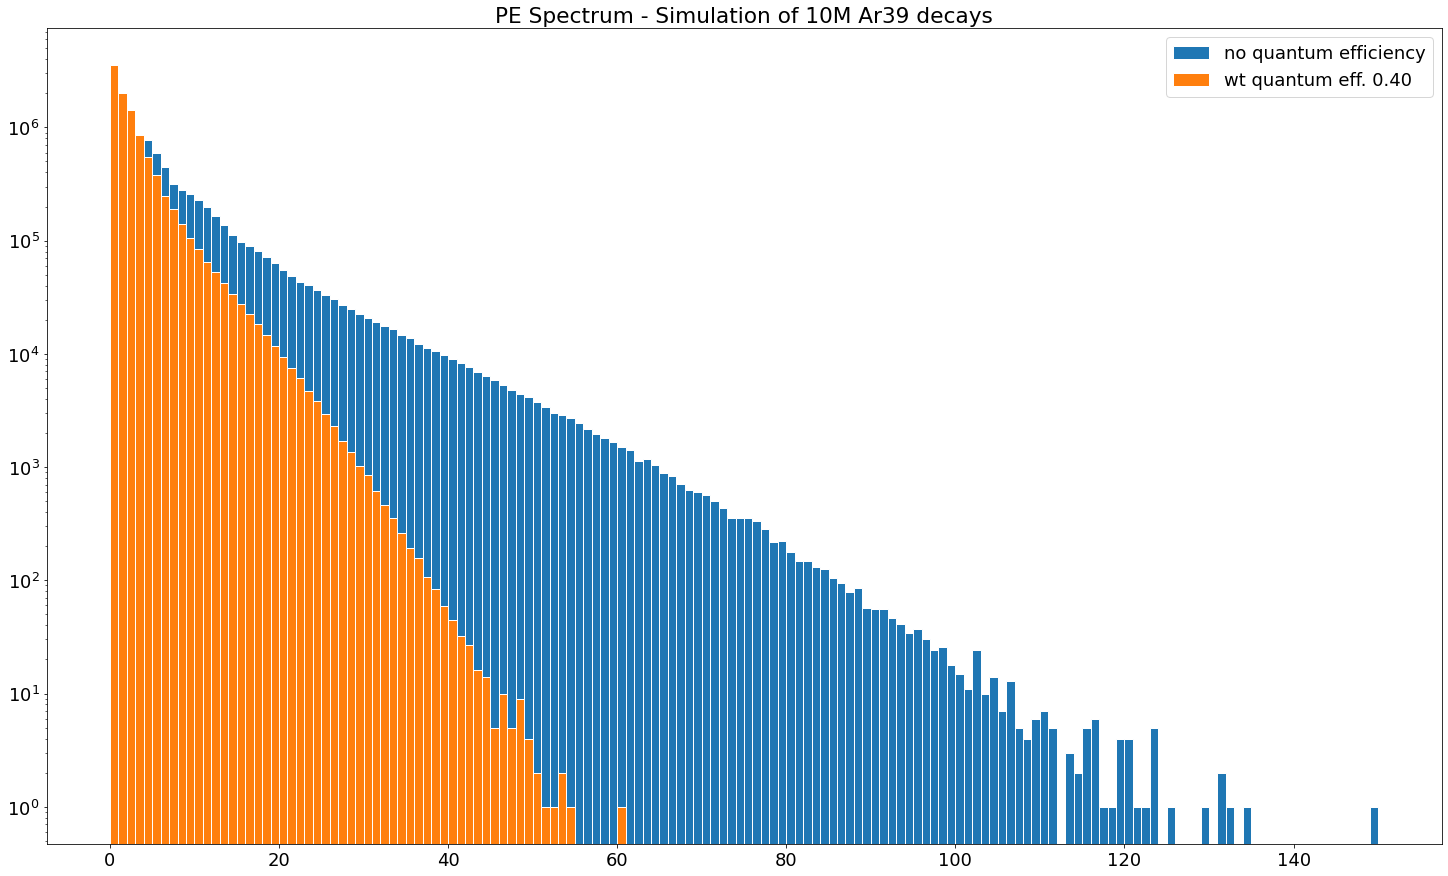

In [31]:
bins = np.linspace(0, 150, 151)
plt.hist(pe_gby.pedetected_noquantum, bins=bins, label="no quantum efficiency", edgecolor='w')
plt.hist(pe_gby.pedetected_wtquantum, bins=bins, label="wt quantum eff. 0.40", edgecolor='w')
plt.yscale("log")
plt.title("PE Spectrum - Simulation of 10M Ar39 decays")
plt.legend()
plt.show()

In [34]:
print("[Info] P(PE>0|quantum eff=1.0) = {}".format(len(pe_gby[pe_gby.pedetected_noquantum>0])/len(pe_gby)))
print("[Info] P(PE>0|quantum eff=0.4) = {}".format(len(pe_gby[pe_gby.pedetected_wtquantum>0])/len(pe_gby)))

[Info] P(PE>0|quantum eff=1.0) = 0.6984523819936693
[Info] P(PE>0|quantum eff=0.4) = 0.6416759440618331


**Conclusion**: M.Schwarz haven't used quantum eff in his code, however in the simulated data we found P(PE>0) ~ .65